In [3]:
# Import necessary packages
import pandas as pd
import numpy as np
from scipy import interpolate, stats
import matplotlib.pyplot as plt

# Open Northern Hemisphere data file
NHfilepath = 'data/NHAnnualExtent_Min_Max_Dates.csv'
NHmin_max = pd.read_csv(NHfilepath)
display(NHmin_max)

# Open Southern Hemisphere data file
SHfilepath = 'data/SHAnnualExtent_Min_Max_Dates.csv'
SHmin_max = pd.read_csv(SHfilepath)
display(SHmin_max)

,Year,min-extent,min-date,max-extent,max-date
0,1979,6.895,9/21/1979,16.635,3/1/1979
1,1980,7.533,9/5/1980,16.302,3/5/1980
2,1981,6.902,9/10/1981,15.801,3/14/1981
3,1982,7.160,9/13/1982,16.325,2/27/1982
4,1983,7.204,9/8/1983,16.412,3/14/1983
5,1984,6.396,9/16/1984,15.809,3/18/1984
6,1985,6.486,9/9/1985,16.163,3/17/1985
7,1986,7.122,9/6/1986,16.158,3/10/1986
8,1987,6.890,9/2/1987,16.293,2/21/1987
9,1988,7.048,9/11/1988,16.309,3/10/1988


,Year,min-extent,min-date,max-extent,max-date
0,1979,2.911,2/17/1979,18.361,9/13/1979
1,1980,2.521,2/26/1980,19.092,9/23/1980
2,1981,2.694,2/20/1981,18.856,9/18/1981
3,1982,2.890,2/23/1982,18.550,9/3/1982
4,1983,2.843,2/24/1983,18.811,9/20/1983
5,1984,2.382,2/27/1984,18.370,9/22/1984
6,1985,2.602,2/19/1985,18.931,9/11/1985
7,1986,2.953,3/6/1986,18.027,9/18/1986
8,1987,3.010,2/21/1987,18.524,9/15/1987
9,1988,2.639,2/24/1988,18.785,10/3/1988


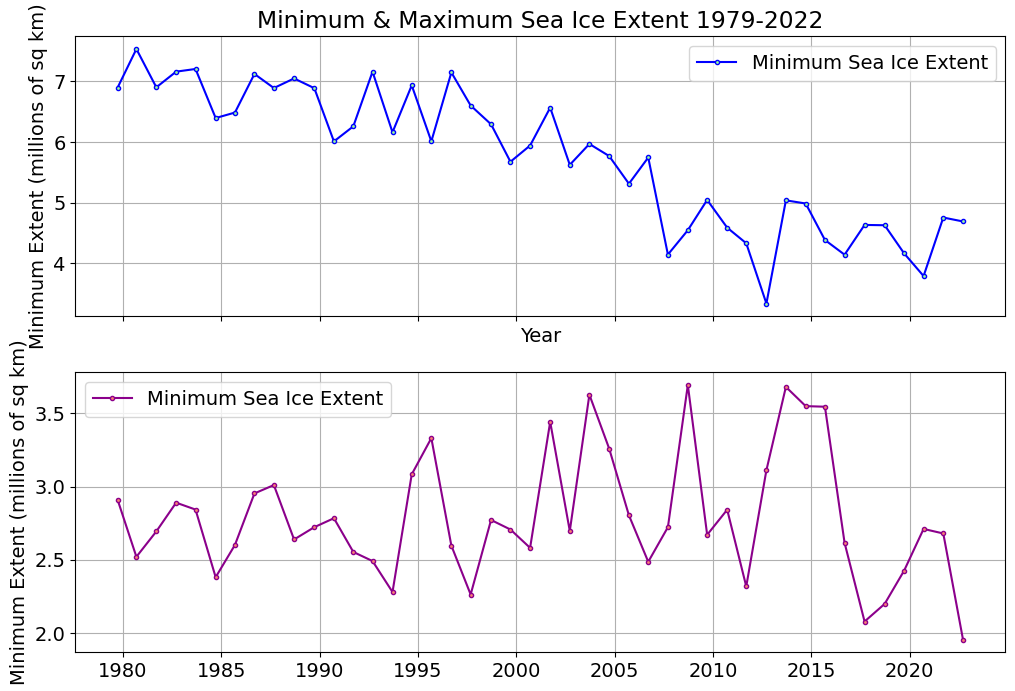

In [19]:
# Convert min values of date columns to datetime format
NHmin_max['min-date'] = pd.to_datetime(NHmin_max['min-date'])
SHmin_max['min-date'] = pd.to_datetime(NHmin_max['min-date'])

# Convert max values of date columns to datetime format
NHmin_max['max-date'] = pd.to_datetime(NHmin_max['max-date'])
SHmin_max['max-date'] = pd.to_datetime(NHmin_max['max-date'])

# Create 2 row subplots to compare min vs. max
fig, axs = plt.subplots(figsize=(12,8), nrows =2, sharex=True)

# first subplot (top) of NH and SH min values
axs[0].plot(NHmin_max['min-date'], NHmin_max['min-extent'], color='blue', label='Minimum Sea Ice Extent', marker='.', markerfacecolor='palegreen')
axs[0].set_xlabel('Year')
axs[0].set_ylabel('Minimum Extent (millions of sq km)')
axs[0].grid()
axs[0].legend()
axs[0].set_title('Minimum & Maximum Sea Ice Extent 1979-2022')

# second subplot (bottom) of NH and SH max values
axs[1].plot(SHmin_max['min-date'], SHmin_max['min-extent'], c='darkmagenta', label='Minimum Sea Ice Extent', marker='.', markerfacecolor='salmon')
axs[1].set_ylabel('Minimum Extent (millions of sq km)')
axs[1].legend()
axs[1].grid()

# change fontsize
plt.rcParams.update({'font.size':14})

plt.show()